# Practice Project 4 - Abalone Case Study

## Importing libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import ShuffleSplit,cross_val_score
import joblib

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Sahil\Documents\DataTrained\Project Documents\Datasets\abalone.csv')

In [3]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [4]:
df.shape

(4177, 9)

## Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**'Sex' is a categorical feature, while 'Length', 'Diameter', 'Height', 'Whole weight', 'Shukled Weight', 'Viscera weight' and 'Shell weight' are continuous features. 'Rings' is the label and the dependent variable data is discrete in nature.**

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

## Description of the dataset as presented in the problem

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

**Name / Data Type / Measurement Unit / Description**

- Sex / nominal / -- / M, F, and I (infant)
- Length / continuous / mm / Longest shell measurement
- Diameter / continuous / mm / perpendicular to length
- Height / continuous / mm / with meat in shell
- Whole weight / continuous / grams / whole abalone
- Shucked weight / continuous / grams / weight of meat
- Viscera weight / continuous / grams / gut weight (after bleeding)
- Shell weight / continuous / grams / after being dried
- Rings / integer / -- / +1.5 gives the age in years.

## Checking for nulls and zeroes

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
(df==0).sum()

Sex               0
Length            0
Diameter          0
Height            2
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

## Interpreting relationship between variables

In [10]:
X = df.drop(columns = ['Rings'])
y = df['Rings']

In [11]:
# analysing the label
df['Rings'].nunique()

28

In [12]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [14]:
df['Rings'].value_counts(ascending=False)

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

<AxesSubplot:xlabel='Rings', ylabel='count'>

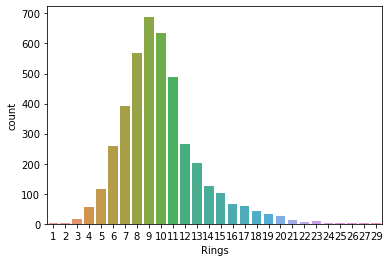

In [16]:
sns.countplot(df['Rings'])

**Findings: The distribution of values in 'Rings' label is skewed to the right with a majority of the values lying between 6 and 13.**

## Visualising the categorical columns and encoding

In [17]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

where M = Male; F = Female; and I = Infant

In [18]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [19]:
df_sex = pd.get_dummies(df['Sex'],drop_first = False)
df_sex

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [20]:
df = df.join(df_sex)

In [21]:
df.drop(columns = ['Sex'],axis = 1, inplace = True)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


## Establishing Correlations

In [22]:
df_corr = df.corr()
df_corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.298421,-0.518552,0.215459
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
F,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
I,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


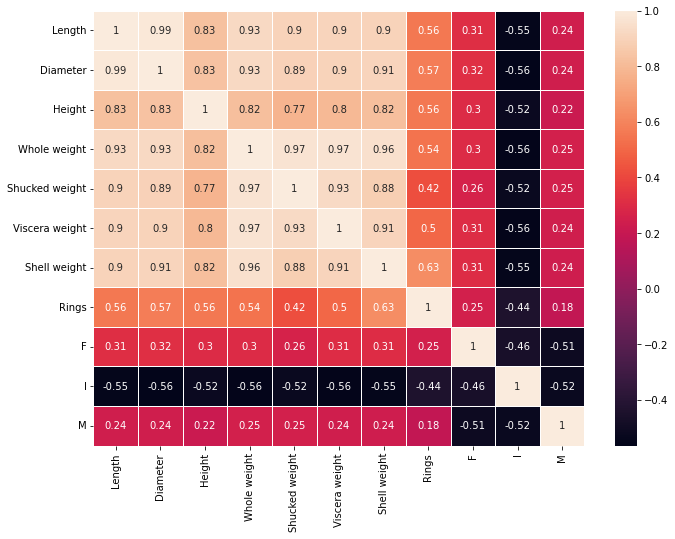

In [25]:
plt.figure(figsize=(11,8))
sns.heatmap(df_corr,annot=True,linewidth=1)
plt.show()

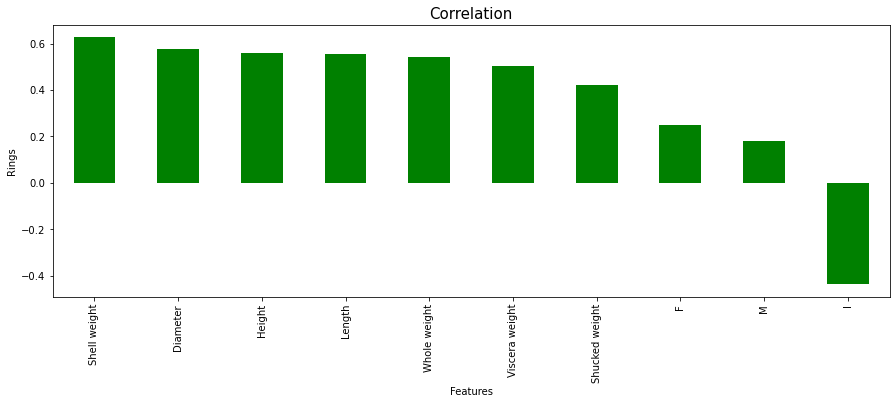

In [26]:
plt.figure(figsize = (15,5))
df.corr()['Rings'].sort_values(ascending = False).drop(['Rings']).plot(kind='bar',color = 'g')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Rings',fontsize=10)
plt.title('Correlation',fontsize = 15)
plt.show()

**Findings:**

1. Shell weight, Diameter, Height, Length, Whole weight, Viscera weight and Shukled weight show a strong positive correlation with the dependent variable 'Rings'.
2. With respect to the Sex of the abalone, Male and Female attributes show a positive correlation, while Infant attribute shows a negative correlation with the dependent variable 'Rings'

## Establishing and interpreting relationship between dependent and independent variables

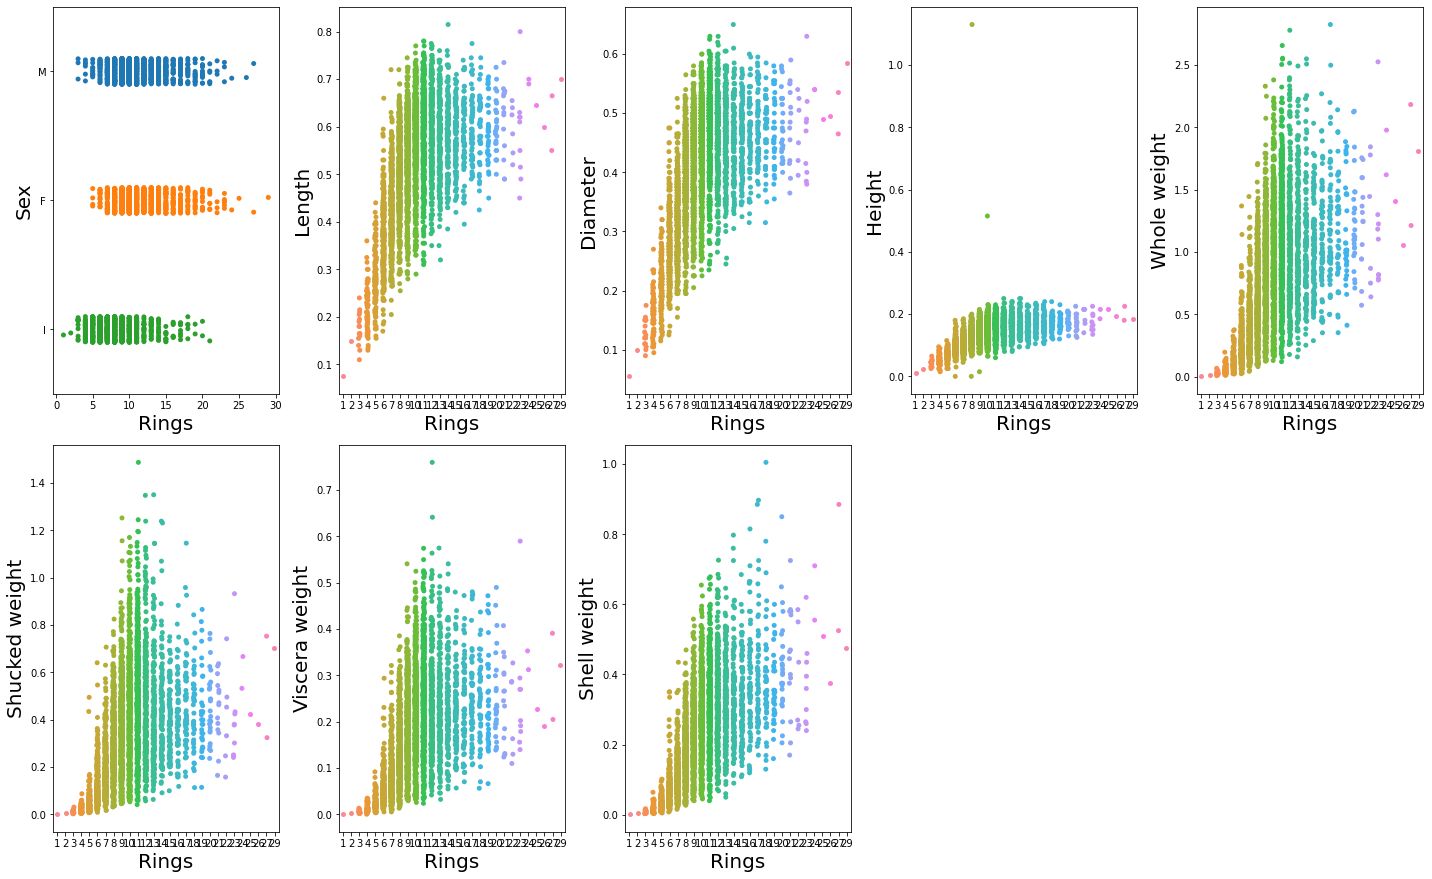

In [27]:
plt.figure(figsize=(20,30))
plotnum=1
y = df['Rings']
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.stripplot(y,X[col])
        plt.xlabel('Rings',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

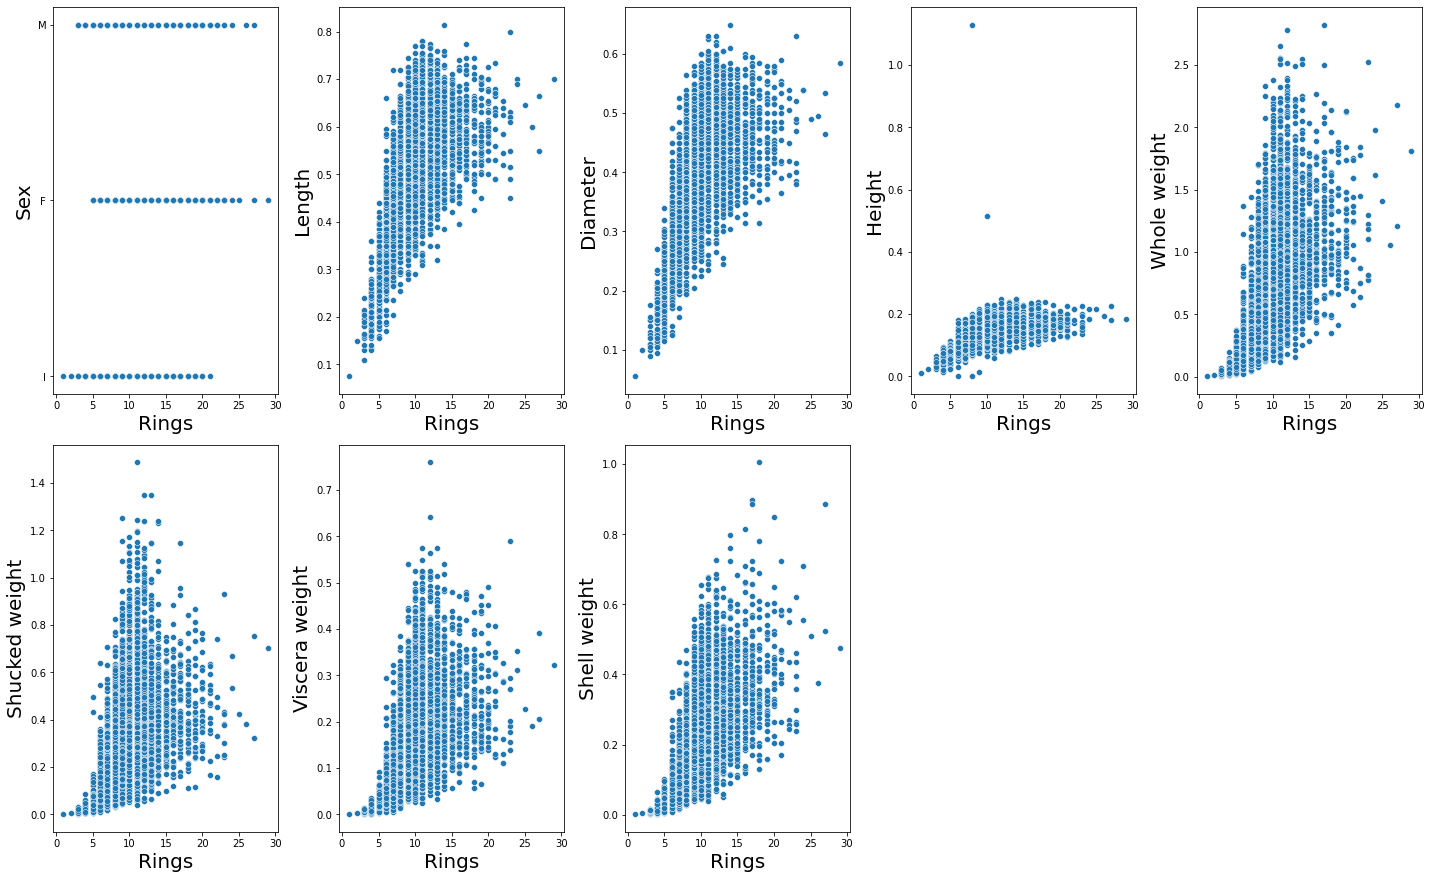

In [28]:
plt.figure(figsize=(20,30))
plotnum=1
y = df['Rings']
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(y,X[col])
        plt.xlabel('Rings',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

This confirms our earlier findings about the correlation between Sex (M, F, I) and 'Rings', where M and F show postive correlation (ranging from 5 to 29) and I shows negative correlation (ranging from 0 to 21).

Also, all other attributes other than 'Height' shows a good linear relationship with the number of rings. There is potential to drop some columns pertaining to weight, based on analysis to be conducted later.

We can also notice the presence of outliers in the features.

## Performing a skewness check

In [29]:
X = df.drop(columns = ['Rings'])
y = df['Rings']

In [31]:
X.drop(columns = ['M','F','I'],axis=1).skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

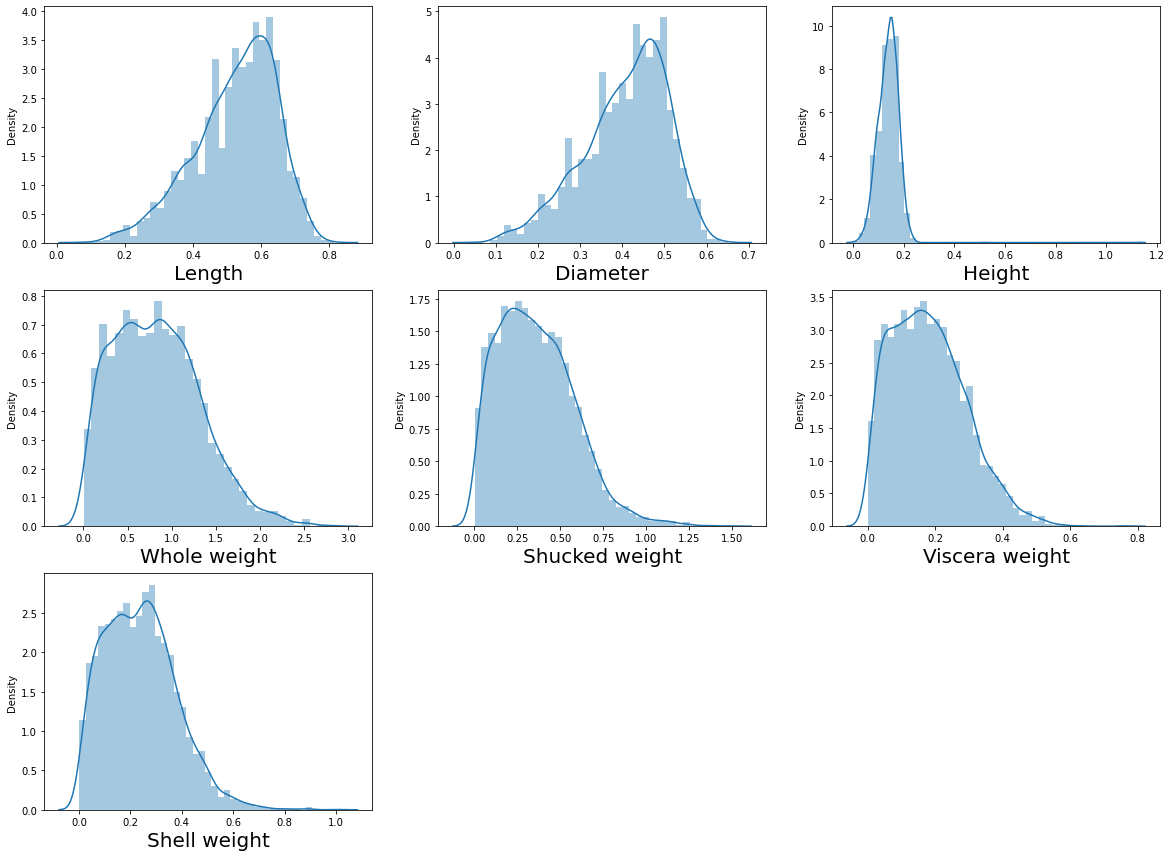

In [35]:
plt.figure(figsize=(20,20))
plotnum=1
for col in X.drop(columns = ['M','F','I'],axis=1):
    if plotnum<=11:
        plt.subplot(4,3,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Findings:**
1. Length and Diameter appear to be left skewed
2. Height, Whole weight, Shukled weight, Viscera weight, and Shell weight appear to be right skewed.

## Performing an outliers check

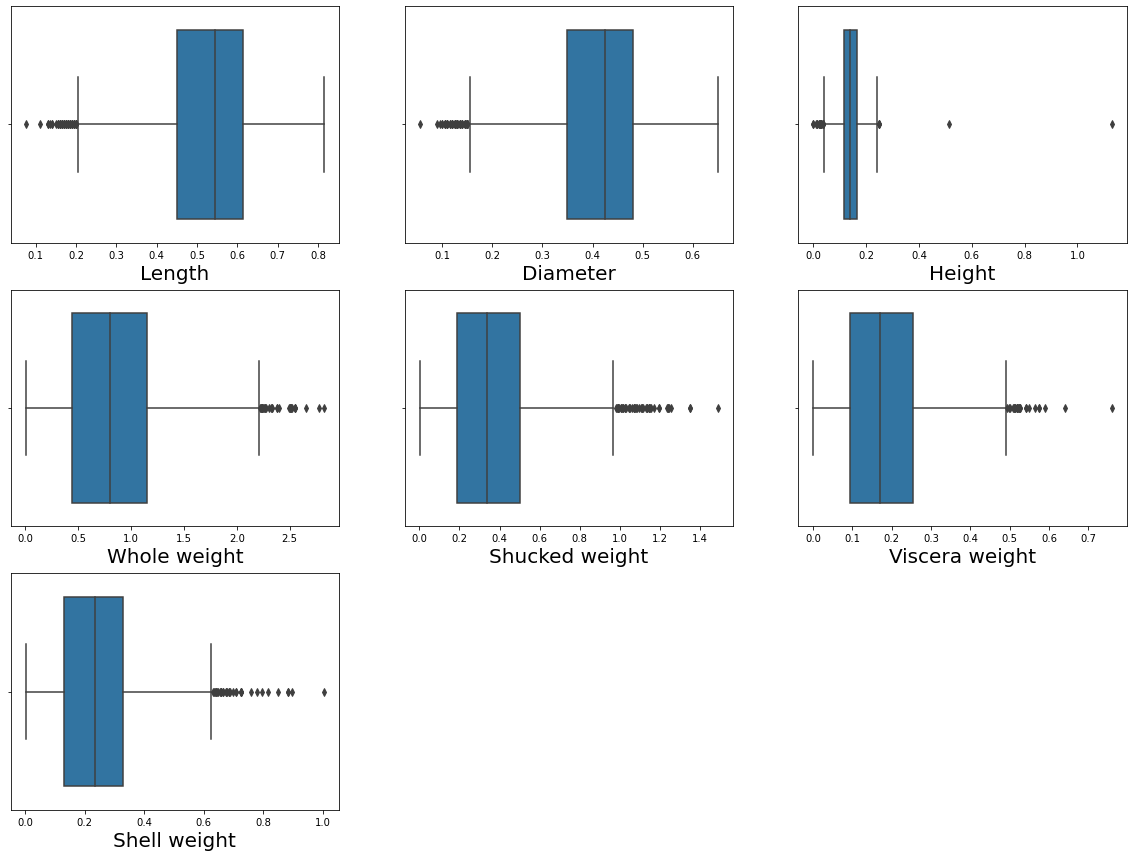

In [36]:
plt.figure(figsize=(20,20))
plotnum=1
for col in X.drop(columns = ['M','F','I'],axis=1):
    if plotnum<=11:
        plt.subplot(4,3,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Findings:**
All features have outliers present in them

## Removing outliers

Using z-score on the features to remove/reduce the outliers, except on M, F and I (sex) features as they contain categorical information

In [37]:
df2 =X.drop(columns = ['M','F','I'],axis=1).copy()

In [38]:
zs = zscore(df2)
z_score_abs = np.abs(zs)

df3 = df2[(z_score_abs < 3).all(axis=1)]

In [39]:
df3.shape

(4084, 7)

In [40]:
df2.shape

(4177, 7)

In [41]:
# checking the data loss
data_loss=(4177-4084)/4177 * 100
data_loss

2.2264783337323437

which is an acceptable percentage of data loss

In [42]:
df3

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [43]:
dropindex = X.index.difference(df3.index)

In [44]:
dropindex

Int64Index([  81,  129,  163,  164,  165,  166,  168,  170,  236,  237,  238,
             239,  277,  334,  358,  526,  694,  696,  719,  720,  891, 1048,
            1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1207, 1209, 1257,
            1417, 1418, 1422, 1426, 1427, 1428, 1429, 1528, 1754, 1756, 1757,
            1759, 1761, 1762, 1763, 1821, 1982, 1986, 1987, 2051, 2090, 2108,
            2114, 2157, 2161, 2208, 2274, 2334, 2368, 2381, 2544, 2623, 2624,
            2625, 2709, 2710, 2810, 2811, 2862, 2863, 3007, 3008, 3148, 3149,
            3151, 3188, 3427, 3599, 3628, 3713, 3715, 3800, 3837, 3899, 3902,
            3961, 3962, 3996, 4145, 4148],
           dtype='int64')

In [45]:
df.drop(dropindex,inplace = True)

In [46]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [47]:
df.shape

(4084, 11)

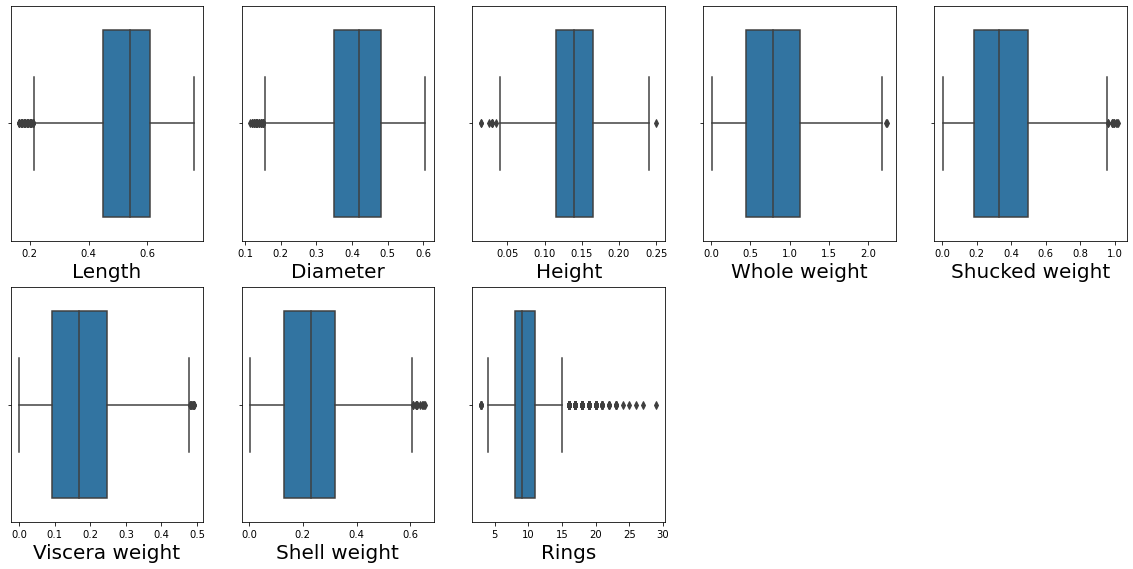

In [49]:
plt.figure(figsize=(20,25))
plotnum=1
for col in df.drop(columns = ['M','F','I'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Performing the z-score has reduced some outliers, but they are still present in all the features

In [50]:
df.drop(columns = ['M','F','I','Rings']).skew()

Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
dtype: float64

In [51]:
features = ['Length', 'Diameter']
df_skewed = df[features].copy()

In [52]:
df_skewed

,Length,Diameter
0,0.455,0.365
1,0.350,0.265
2,0.530,0.420
3,0.440,0.365
4,0.330,0.255
...,...,...
4172,0.565,0.450
4173,0.590,0.440
4174,0.600,0.475
4175,0.625,0.485


Applying Power Transformer on Length and Diameter to further reduce the skewness

In [53]:
p_t = PowerTransformer(method='yeo-johnson', standardize=True)

In [54]:
df_trans = p_t.fit_transform(df_skewed)

In [55]:
type(df_trans)

numpy.ndarray

In [56]:
df_trans = pd.DataFrame(df_trans, columns=df_skewed.columns)

In [57]:
df_trans.skew()

Length     -0.084034
Diameter   -0.080768
dtype: float64

In [58]:
df_skewed.skew()

Length     -0.633786
Diameter   -0.605450
dtype: float64

In [59]:
df.reset_index(drop=True, inplace=True)

In [60]:
df_trans.index = df.index

In [61]:
df[features] = df_trans[features]

In [62]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,-0.696161,-0.554594,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,-1.420433,-1.409424,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,-0.058200,0.025024,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,-0.811094,-0.554594,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,-1.538442,-1.482282,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4079,0.278101,0.378060,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4080,0.534430,0.257350,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4081,0.640858,0.693557,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4082,0.916960,0.825397,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [63]:
df.drop(columns = ['M','F','I','Rings']).skew()

Length           -0.084034
Diameter         -0.080768
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
dtype: float64

In [64]:
X = df.drop(columns = ['Rings'])
y = df['Rings']

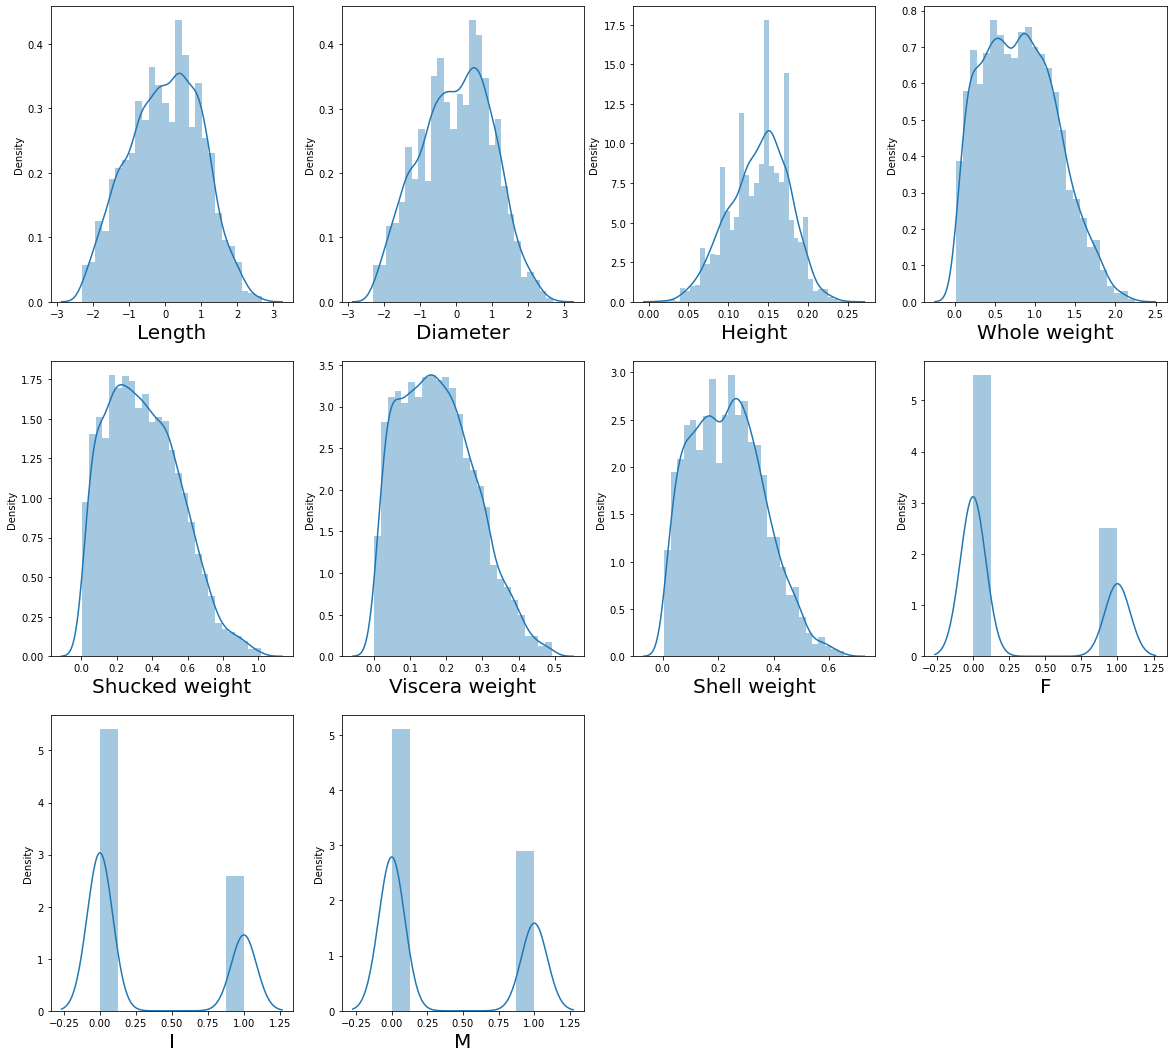

In [65]:
plt.figure(figsize=(20,25))
plotnum=1
for col in X:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### The distributions appear normalised than before

## Performing Feature Selection

In [66]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [67]:
scaled_X

array([[-0.69616075, -0.55459434, -1.17659224, ..., -0.67448802,
        -0.69299817,  1.32504169],
       [-1.42043347, -1.40942442, -1.31174068, ..., -0.67448802,
        -0.69299817,  1.32504169],
       [-0.05819969,  0.02502394, -0.09540474, ...,  1.48260601,
        -0.69299817, -0.75469323],
       ...,
       [ 0.6408576 ,  0.69355676,  1.79667339, ..., -0.67448802,
        -0.69299817,  1.32504169],
       [ 0.91696004,  0.82539728,  0.31004058, ...,  1.48260601,
        -0.69299817, -0.75469323],
       [ 1.96945388,  1.84446429,  1.52637652, ..., -0.67448802,
        -0.69299817,  1.32504169]])

In [68]:
m = MinMaxScaler()
mmscaled_X = m.fit_transform(X)
mmscaled_X

array([[0.32319352, 0.35029116, 0.34042553, ..., 0.        , 0.        ,
        1.        ],
       [0.17788028, 0.17877945, 0.31914894, ..., 0.        , 0.        ,
        1.        ],
       [0.45118977, 0.46658483, 0.5106383 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.59144395, 0.60071816, 0.80851064, ..., 0.        , 0.        ,
        1.        ],
       [0.6468393 , 0.62717043, 0.57446809, ..., 1.        , 0.        ,
        0.        ],
       [0.85800464, 0.83163437, 0.76595745, ..., 0.        , 0.        ,
        1.        ]])

**Converting 'Rings' to 'Abalone Age' by adding 1.5 to the information in 'Rings'**

In [69]:
y2 = y.add(1.5)
y2

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4079    12.5
4080    11.5
4081    10.5
4082    11.5
4083    13.5
Name: Rings, Length: 4084, dtype: float64

## Using SelectKBest to assess importance of features

In [70]:
bestfeat = SelectKBest(score_func = f_classif, k = 10)
fit = bestfeat.fit(X,y2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [71]:
fit = bestfeat.fit(X,y2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10,'Score'))

          Feature       Score
2          Height  173.563768
6    Shell weight  158.816862
1        Diameter  153.602719
0          Length  145.274352
3    Whole weight  122.994202
5  Viscera weight  111.060846
4  Shucked weight   88.515324
8               I   69.911753
7               F   16.798039
9               M   10.945852


**Findings:**
All features have a good score based on the application of SeelctKBest, with some features having very high scores. However, this implies we need not drop any columns for building our model

## Model Building

Since predicting the age of the abalone is not a classification problem, we are going to apply regression models to predict the age. Following are the models that are going to be used:
- Linear Regression
- Random Forest Regressor
- Support Vector Regression (SVR)
- Ridge Regression

In [72]:
x_train,x_test,y_train,y_test = train_test_split(mmscaled_X,y2,test_size = .25, random_state = 1)

In [75]:
lr = LinearRegression()
rf = RandomForestRegressor()
svr = SVR()
rr = Ridge()

In [77]:
# training the models
lr.fit(x_train,y_train)

LinearRegression()

In [78]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [79]:
svr.fit(x_train,y_train)

SVR()

In [80]:
rr.fit(x_train,y_train)

Ridge()

### Linear Regression

In [81]:
lr_pred = lr.predict(x_test)

print('R2 Score :',r2_score(y_test,lr_pred),'\n')

print('Mean Squared Error :',mean_squared_error(y_test,lr_pred))

R2 Score : 0.5481968225076068 

Mean Squared Error : 4.670804934882766


### Random Forest Regressor

In [82]:
rf_pred = rf.predict(x_test)

print('R2 Score :',r2_score(y_test,rf_pred),'\n')

print('Mean Squared Error :',mean_squared_error(y_test,rf_pred))

R2 Score : 0.5522725072567236 

Mean Squared Error : 4.628669931439765


### Support Vector Regressor (SVR)

In [83]:
svr_pred = svr.predict(x_test)

print('R2 Score :',r2_score(y_test,svr_pred),'\n')

print('Mean Squared Error :',mean_squared_error(y_test,svr_pred))

R2 Score : 0.49177632933138804 

Mean Squared Error : 5.254087946345074


### Ridge Regressor

In [84]:
rr_pred = rr.predict(x_test)

print('R2 Score :',r2_score(y_test,rr_pred),'\n')

print('Mean Squared Error :',mean_squared_error(y_test,rr_pred))

R2 Score : 0.5378277197549884 

Mean Squared Error : 4.778002180763252


## Model Cross Validation

In [87]:
# model cross validation

print('Cross validation for Linear Regression: ', cross_val_score(lr,mmscaled_X,y2,cv=ShuffleSplit(5)).mean(), '\n')

print('Cross validation for Random Forest Regressor: ', cross_val_score(rf,mmscaled_X,y2,cv=ShuffleSplit(5)).mean(), '\n')

print('Cross validation for Support Vector Regressor: ', cross_val_score(svr,mmscaled_X,y2,cv=ShuffleSplit(5)).mean(), '\n')

print('Cross validation for Ridge Regressor: ', cross_val_score(rr,mmscaled_X,y2,cv=ShuffleSplit(5)).mean())

Cross validation for Linear Regression:  0.5104358505966201 

Cross validation for Random Forest Regressor:  0.5239692231944688 

Cross validation for Support Vector Regressor:  0.4970372435155143 

Cross validation for Ridge Regressor:  0.5204407459100204


**Findings:**
Based on the above analysis of the R2 Score, Mean Squared Error and Cross Validation results, it is evident that Random Forest Regressor is giving us the best results

## Hyperparameter Tuning

In [88]:
parameter = {'n_estimators':[30,60],
             'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],
             'min_samples_split':[5,10],
             'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]
            }

In [89]:
gscv = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1)

In [90]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60]})

In [91]:
gscv.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 30}

In [93]:
Best_rf = RandomForestRegressor(n_estimators = 30,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 10, min_samples_split = 5)

In [94]:
Best_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=5,
                      n_estimators=30)

In [96]:
rfpred = Best_rf.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

56.27186782088282


#### `Our model is giving us a 56.27% accuracy.`

## Saving the model using joblib

In [97]:
joblib.dump(Best_rf,"Abalone Age Prediction Model.pkl")

['Abalone Age Prediction Model.pkl']

# `END`